In [14]:
import pandas as pd

# Try different encodings
df = pd.read_csv("stores_sales_forecasting.csv", encoding='latin1')
# or
df = pd.read_csv("stores_sales_forecasting.csv", encoding='ISO-8859-1')
# or
df = pd.read_csv("stores_sales_forecasting.csv", encoding='cp1252')


In [15]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [16]:
import pandas as pd

# Load Data
df = pd.read_csv("stores_sales_forecasting.csv", encoding='latin1')

# Data Cleaning
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df = df.drop_duplicates()
df = df.fillna({
    'Sales': 0, 'Quantity': 0, 'Discount': 0, 'Profit': 0
})

# Feature Engineering
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Sales_Per_Unit'] = df['Sales'] / df['Quantity']

# Aggregation
sales_by_region = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).reset_index()

sales_by_city = df.groupby('City').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).reset_index()

# Save Transformed Data
sales_by_region.to_csv("sales_by_region.csv", index=False)
sales_by_city.to_csv("sales_by_city.csv", index=False)


In [17]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Sales_Per_Unit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,130.9800
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,243.9800
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,191.5155


In [18]:
# Check for missing values in each column of the c DataFrame
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Order Year        0
Order Month       0
Order Day         0
Sales_Per_Unit    0
dtype: int64


In [19]:
df.duplicated().sum()

0

Key Insights To Derive:

Total sales, profit, and quantity trends over time (yearly, monthly).
Customer segment performance: Which segment contributes the most to sales or profit?
Product performance: Which products or categories have the highest sales per unit?
Discount impact on sales and profit 

Calculate Total Sales, Profit, and Quantity Sold

In [20]:
# Calculate total sales, profit, and quantity sold
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_quantity = df['Quantity'].sum()

# Print the results
print(f"Total Sales: {total_sales}")
print(f"Total Profit: {total_profit}")
print(f"Total Quantity Sold: {total_quantity}")


Total Sales: 741999.7953
Total Profit: 18451.272800000006
Total Quantity Sold: 8028


 Group Data by Order Year, Order Month, or Segment

In [21]:
# Group by 'Order Year' and calculate total sales, profit, and quantity for each year
sales_by_year = df.groupby('Order Year').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

# Display the results
print(sales_by_year)


   Order Year        Sales     Profit  Quantity
0        2014  157192.8531  5457.7255      1623
1        2015  170518.2370  3015.2029      1775
2        2016  198901.4360  6959.9531      2193
3        2017  215387.2692  3018.3913      2437


C:\Users\USER\AppData\Local\Temp\ipykernel_10528\585416928.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Year', y='Sales', data=sales_by_year, ax=ax[0], palette='Blues_d')
C:\Users\USER\AppData\Local\Temp\ipykernel_10528\585416928.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Year', y='Profit', data=sales_by_year, ax=ax[1], palette='Greens_d')
C:\Users\USER\AppData\Local\Temp\ipykernel_10528\585416928.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Year', y='Quantity', data=sales_by_year, ax=ax[2

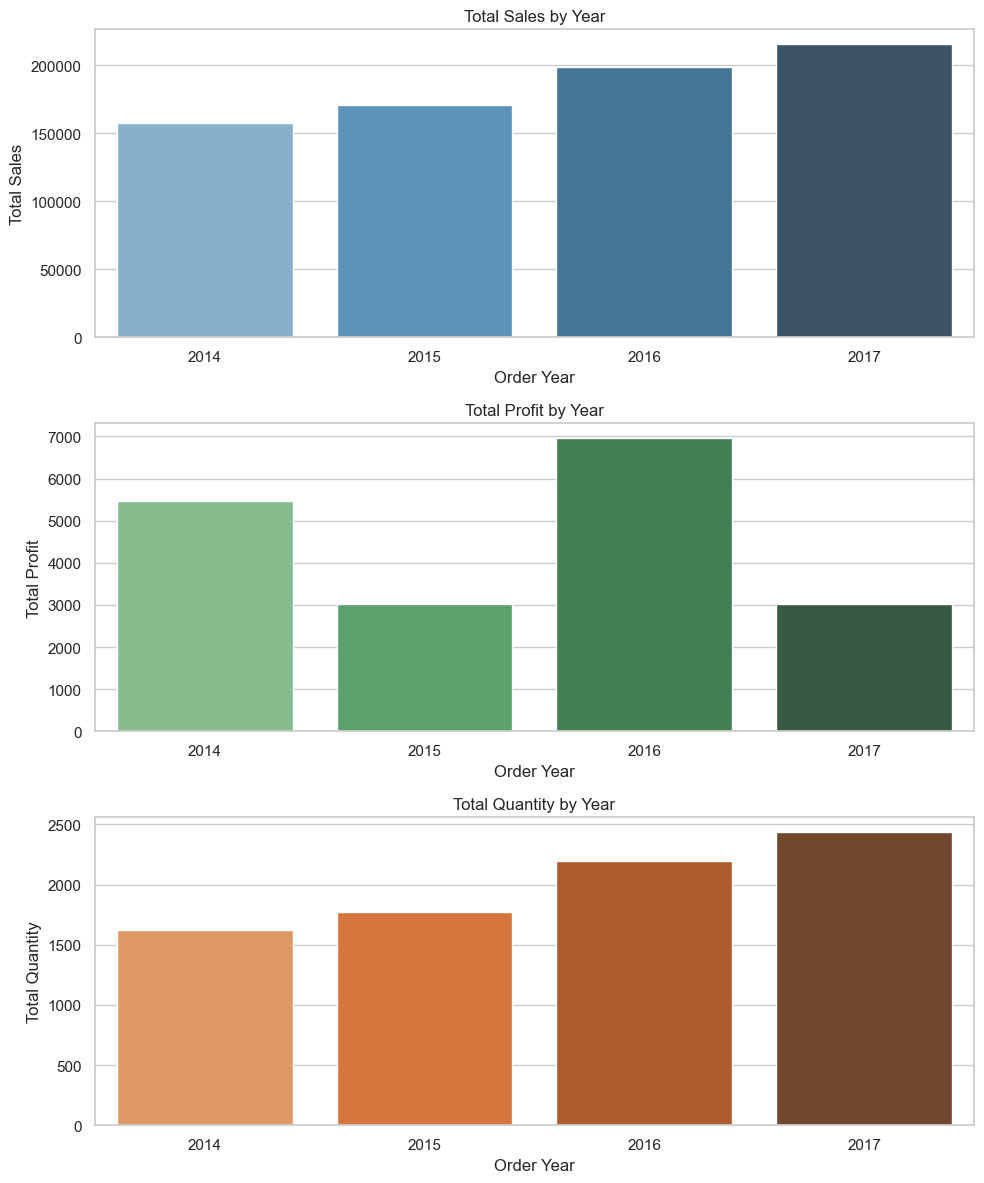

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Order Year' and calculate total sales, profit, and quantity for each year
sales_by_year = df.groupby('Order Year').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Create a figure and axes for the plots
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Plot total sales by year
sns.barplot(x='Order Year', y='Sales', data=sales_by_year, ax=ax[0], palette='Blues_d')
ax[0].set_title('Total Sales by Year')
ax[0].set_xlabel('Order Year')
ax[0].set_ylabel('Total Sales')

# Plot total profit by year
sns.barplot(x='Order Year', y='Profit', data=sales_by_year, ax=ax[1], palette='Greens_d')
ax[1].set_title('Total Profit by Year')
ax[1].set_xlabel('Order Year')
ax[1].set_ylabel('Total Profit')

# Plot total quantity by year
sns.barplot(x='Order Year', y='Quantity', data=sales_by_year, ax=ax[2], palette='Oranges_d')
ax[2].set_title('Total Quantity by Year')
ax[2].set_xlabel('Order Year')
ax[2].set_ylabel('Total Quantity')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [24]:
# Group by 'Order Month' to analyze monthly trends
sales_by_month = df.groupby('Order Month').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

# Display the results
print(sales_by_month)


    Order Month        Sales     Profit  Quantity
0             1   31569.2416 -1944.2130       345
1             2   15765.9204   693.5796       208
2             3   50768.2758   771.9875       527
3             4   40698.5836  1460.3261       509
4             5   48365.1307  2302.2981       588
5             6   52999.4633   982.3847       538
6             7   49377.0120  1412.6846       618
7             8   44884.0450     4.0941       461
8             9  106380.5907  5460.0023       999
9            10   58087.5157 -3027.9321       709
10           11  121286.0490  3920.0007      1220
11           12  121817.9675  6416.0602      1306


In [25]:
# Group by 'Segment' to see the performance across different customer segments
sales_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

# Display the results
print(sales_by_segment)


       Segment        Sales     Profit  Quantity
0     Consumer  391049.3120  6991.0786      4166
1    Corporate  229019.7858  7584.8158      2495
2  Home Office  121930.6975  3875.3784      1367


 Calculate Sales_Per_Unit

In [26]:
# Assuming 'Sales_Per_Unit' is already calculated in your dataset, but if not, you can calculate it:
df['Sales_Per_Unit'] = df['Sales'] / df['Quantity']

# Group by 'Sub-Category' to compare average sales per unit
sales_per_unit_by_category = df.groupby('Sub-Category').agg({'Sales_Per_Unit': 'mean'}).reset_index()

# Display the results
print(sales_per_unit_by_category)


  Sub-Category  Sales_Per_Unit
0    Bookcases      131.100152
1       Chairs      138.802472
2  Furnishings       25.607413
3       Tables      165.088613


In [27]:
# Sort by 'Sales_Per_Unit' to see the highest performing categories
sorted_sales_per_unit = sales_per_unit_by_category.sort_values(by='Sales_Per_Unit', ascending=False)

# Display the top categories by sales per unit
print(sorted_sales_per_unit)


  Sub-Category  Sales_Per_Unit
3       Tables      165.088613
1       Chairs      138.802472
0    Bookcases      131.100152
2  Furnishings       25.607413


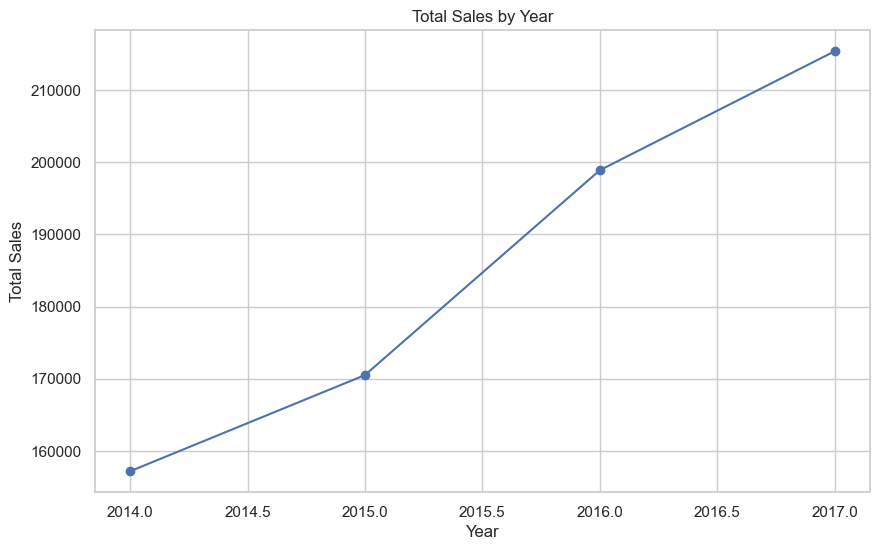

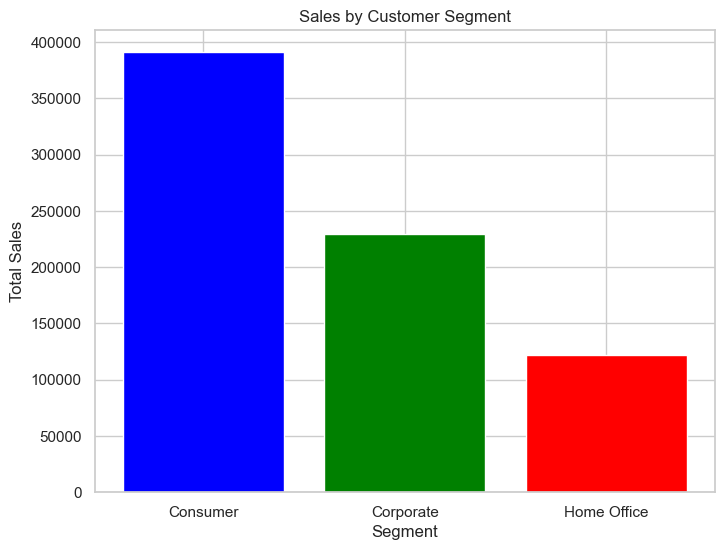

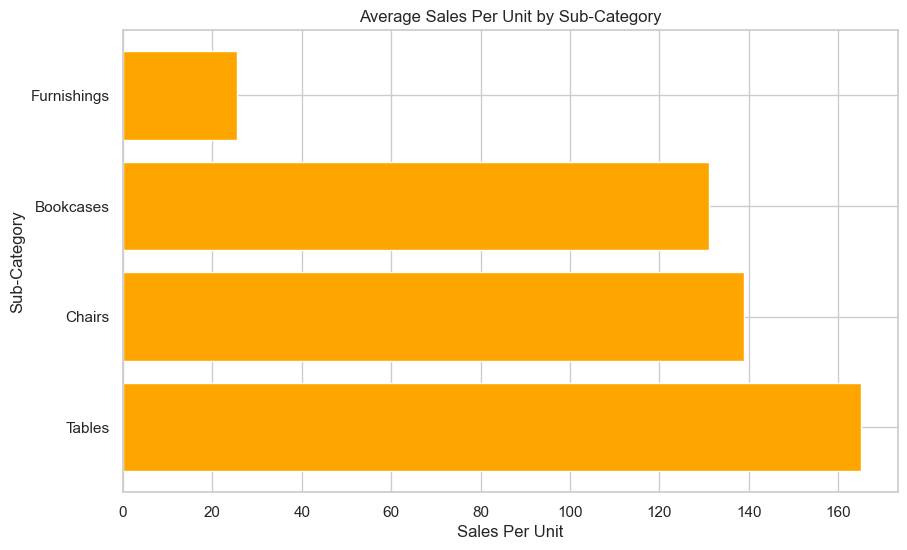

In [28]:
import matplotlib.pyplot as plt

# Plot sales trends by year
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year['Order Year'], sales_by_year['Sales'], marker='o', color='b')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Plot sales by segment
plt.figure(figsize=(8, 6))
plt.bar(sales_by_segment['Segment'], sales_by_segment['Sales'], color=['blue', 'green', 'red'])
plt.title('Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()

# Plot sales per unit by category
plt.figure(figsize=(10, 6))
plt.barh(sorted_sales_per_unit['Sub-Category'], sorted_sales_per_unit['Sales_Per_Unit'], color='orange')
plt.title('Average Sales Per Unit by Sub-Category')
plt.xlabel('Sales Per Unit')
plt.ylabel('Sub-Category')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_10528\1745818720.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Sales', data=top_cities, palette='Blues_d')


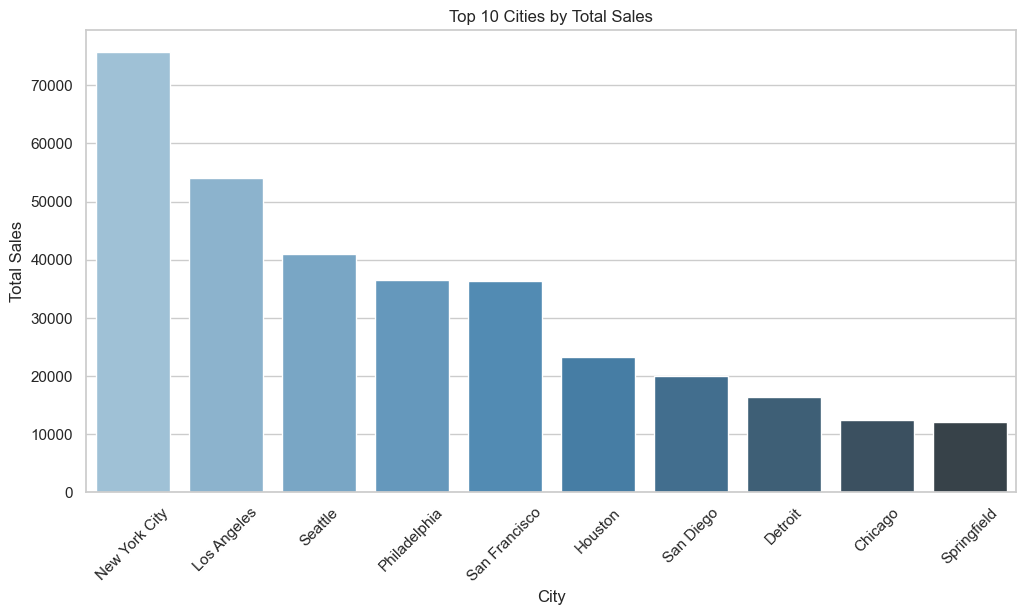

In [29]:
# Grouping data by country and city to calculate total sales, profit, and quantity
geo_sales = df.groupby(['Country', 'City']).agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

# Visualizing geographical sales performance using a bar plot
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 cities by sales
top_cities = geo_sales.sort_values('Sales', ascending=False).head(10)

# Plotting the sales by city
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Sales', data=top_cities, palette='Blues_d')
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()
